In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit
from qiskit import Aer, execute
from numpy import pi
import numpy as np

In [2]:
# Get the data from the .csv file
url = 'https://raw.githubusercontent.com/SashwatAnagolum/DoNew/master/kmeans/kmeans_data.csv'
data = pd.read_csv(url, on_bad_lines='skip', usecols=['Feature 1', 'Feature 2', 'Class'])

In [3]:
data

,Feature 1,Feature 2,Class
0,-0.646,0.763,Green
1,-0.610,0.617,Green
2,-0.596,0.915,Green
3,-0.565,0.927,Green
4,-0.542,0.631,Green
...,...,...,...
70,0.719,0.307,Black
71,0.724,0.113,Black
72,0.739,0.432,Black
73,0.784,0.257,Black


In [4]:
# Create binary variables to filter data
isGreen = data['Class'] == 'Green'
isBlue = data['Class'] == 'Blue'
isBlack = data['Class'] == 'Black'

In [5]:
# Filter data
greenData = data[isGreen].drop(['Class'], axis=1)
blueData = data[isBlue].drop(['Class'], axis=1)
blackData = data[isBlack].drop(['Class'], axis=1)

In [6]:
# This is the point we need to classify
y_p = 0.141
x_p = -0.161

In [7]:
# Finding the x-coords of the centroids
xgc = sum(greenData['Feature 1']) / len(greenData['Feature 1'])
xbc = sum(blueData['Feature 1']) / len(blueData['Feature 1'])
xkc = sum(blackData['Feature 1']) / len(blackData['Feature 1'])

# Finding the y-coords of the centroids
ygc = sum(greenData['Feature 2']) / len(greenData['Feature 2'])
ybc = sum(blueData['Feature 2']) / len(blueData['Feature 2'])
ykc = sum(blackData['Feature 2']) / len(blackData['Feature 2'])

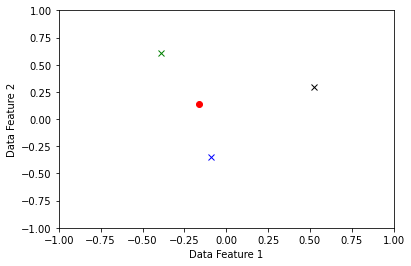

In [8]:
fig, ax = plt.subplots()
ax.set(xlabel='Data Feature 1', ylabel='Data Feature 2')

# Plotting the centroids
plt.plot(xgc, ygc, 'gx')
plt.plot(xbc, ybc, 'bx')
plt.plot(xkc, ykc, 'kx')

# Plotting the new data point
plt.plot(x_p, y_p, 'ro')

# Setting the axis ranges
plt.axis([-1, 1, -1, 1])

plt.show()


In [ ]:
# Calculating theta and phi values
phi_list = [((x + 1) * pi / 2) for x in [x_p, xgc, xbc, xkc]]
theta_list = [((x + 1) * pi / 2) for x in [y_p, ygc, ybc, ykc]]

In [ ]:
# Create a 2 qubit QuantumRegister - two for the vectors, and 
# one for the ancillary qubit
qreg = QuantumRegister(3, 'qreg')

# Create a one bit ClassicalRegister to hold the result
# of the measurements
creg = ClassicalRegister(1, 'creg')

qc = QuantumCircuit(qreg, creg, name='qc')

In [ ]:
# Get backend using the Aer provider
backend = Aer.get_backend('qasm_simulator')

In [ ]:
# Create list to hold the results
results_list = []

In [ ]:
# Estimating distances from the new point to the centroids
for i in range(1, 4):
    # Apply a Hadamard to the ancillary
    qc.h(qreg[2])

    # Encode new point and centroid
    qc.u(theta_list[0], phi_list[0], 0, qreg[0])           
    qc.u(theta_list[i], phi_list[i], 0, qreg[1]) 

    # Perform controlled swap
    qc.cswap(qreg[2], qreg[0], qreg[1])
    # Apply second Hadamard to ancillary
    qc.h(qreg[2])

    # Measure ancillary
    qc.measure(qreg[2], creg[0])

    # Reset qubits
    qc.reset(qreg)

    # Register and execute job
    job = execute(qc, backend=backend, shots=1024)
    result = job.result().get_counts(qc)
    results_list.append(result['1'])

print(results_list)

In [ ]:
# Create a list to hold the possible classes
class_list = ['Green', 'Blue', 'Black']

In [ ]:
# Find out which class the new data point belongs to 
# according to our distance estimation algorithm
quantum_p_class = class_list[results_list.index(min(results_list))]

In [ ]:
# Find out which class the new data point belongs to 
# according to classical euclidean distance calculation
distances_list = [((x_p - i[0])**2 + (y_p - i[1])**2)**0.5 for i in [(xgc, ygc), (xbc, ybc), (xkc, ykc)]]
classical_p_class = class_list[distances_list.index(min(distances_list))]

In [ ]:
# Print results
print("""According to our distance algorithm,
 the new data point belongs to the""", quantum_p_class, 
 'class.\n')
print('Euclidean distances: ', distances_list, '\n')
print("""According to euclidean distance calculations,
 the new data point belongs to the""", classical_p_class, 
 'class.')

In [5]:
rows, cols = np.tril_indices(8, m=8)

In [6]:
rows

array([0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6,
       6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7])

In [7]:
cols

array([0, 0, 1, 0, 1, 2, 0, 1, 2, 3, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 7])